# Общая информация
__Цель:__ изучить влияние NER на качество отвечаемости title

__Задачи:__

1) Сделать кореляционную матрицу для оценки взаимосвязи наличия NER в заголовке и теле вопроса

2) Использовать байесовскую сеть для анализа

3) Сделать выводы

In [2]:
import warnings

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import bnlearn as bn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")

pd.set_option("display.max_colwidth", None)

# Фиксация сидов

In [4]:
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
df = pd.read_pickle(r'D:\vkr\data\prepared\df_200_ner_cleared.pkl')

# Корреляционный анализ

## Анализ частоты встречаемости

In [2]:
labels = ['Algorithm', 'Application',
'Class', 'Code_Block', 'Data_Structure', 'Data_Type',
'Device', 'Error_Name', 'File_Name', 'File_Type', 'Function',
'HTML_XML_Tag', 'Keyboard_IP', 'Language', 'Library',
'Licence', 'Operating_System', 'Organization', 'Output_Block',
'User_Interface_Element', 'User_Name', 'Value', 'Variable',
'Version', 'Website']

In [7]:
t_entities_df = df.iloc[:, -25:]
q_entities_df = df.iloc[:, -50:-25]

In [8]:
q_ners = np.sum(q_entities_df, axis=0)
q_ners = q_ners.values
q_ners_names = ['Q_'+label for label in labels]
q_ners = q_ners[:, None]
print(q_ners.shape)

(25, 1)


In [9]:
t_ners = np.sum(t_entities_df, axis=0)
t_ners = t_ners.values
t_ners_names = ['T_'+label for label in labels]
t_ners = t_ners[None, :]
print(t_ners.shape)

(1, 25)


In [10]:
freq_matrix = np.divide(t_ners, q_ners, out=np.zeros_like(t_ners/q_ners), where=q_ners!=0)

[Text(0.5, 1.0, 'Count NERs in Body divided by count NERs in Title'),
 Text(0.5, -32.875, 'Title NERs'),
 Text(131.09375, 0.5, 'Body NERs')]

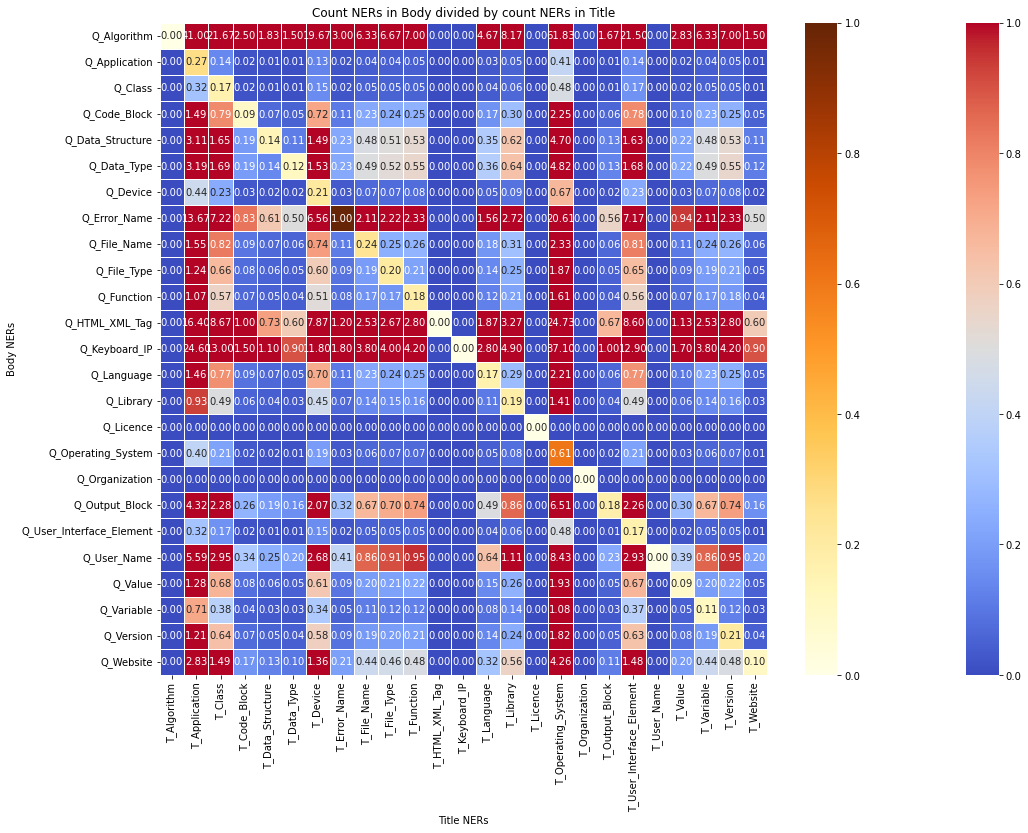

In [11]:
plt.figure(figsize=(17,12))
off_diag_mask = np.eye(*freq_matrix.shape, dtype=bool)


ax = sns.heatmap(
    freq_matrix,
    annot=True,
    linewidth=0.5,
    fmt=".2f",
    xticklabels=t_ners_names,
    yticklabels=q_ners_names,
    mask=off_diag_mask,
    cmap='coolwarm',
    vmax=1,
    vmin=0
    
)

ax = sns.heatmap(
    freq_matrix,
    annot=True,
    cmap="YlOrBr",
    linewidth=0.5,
    fmt=".2f",
    xticklabels=t_ners_names,
    yticklabels=q_ners_names,
    mask=~off_diag_mask,
)

ax.set(title="Count NERs in Body divided by count NERs in Title",
      xlabel="Title NERs",
      ylabel="Body NERs",)

## Корреляции Question и Title

In [12]:
t_entities_df = df.iloc[:, -25:]
q_entities_df = df.iloc[:, -50:-25]

In [13]:
t_entities = t_entities_df.values
q_entities = q_entities_df.values
print(t_entities.shape)
print(q_entities.shape)

(707, 25)
(707, 25)


## Корреляционная матрица для NER в заголовках

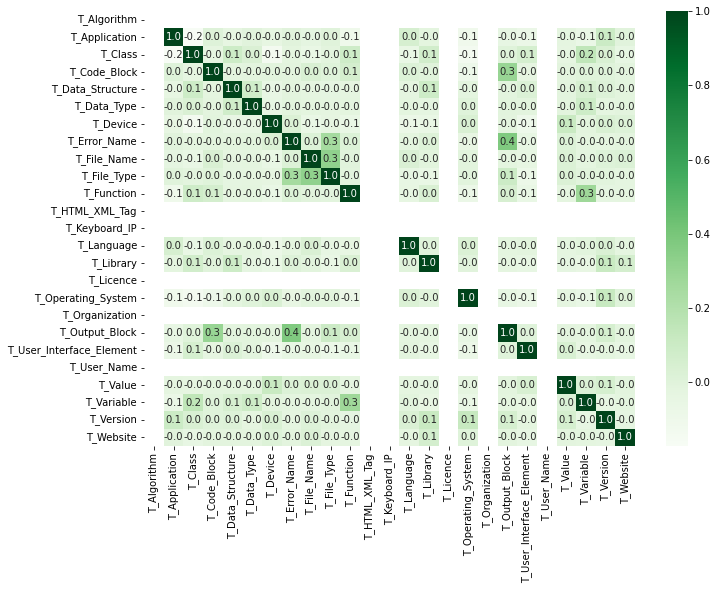

In [14]:
t_corr = t_entities_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(t_corr, cmap="Greens",annot=True, fmt=".1f",)
plt.show()

## Корреляционная матрица для NER в вопросах

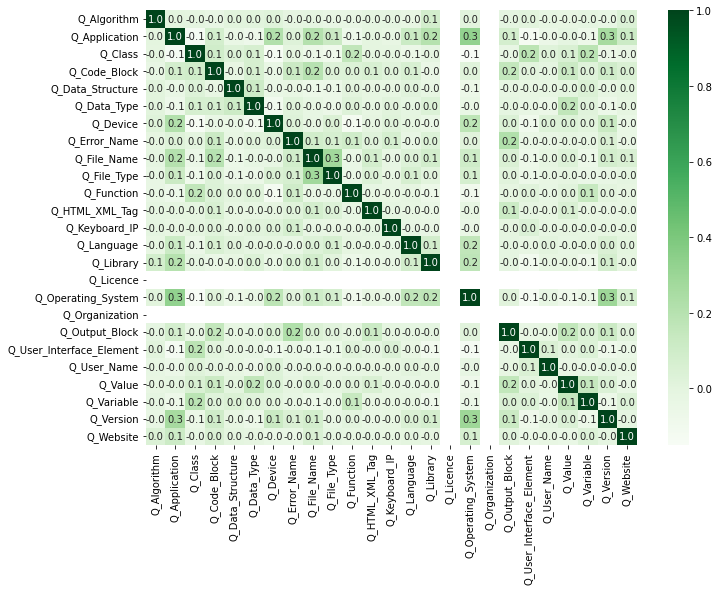

In [15]:
q_corr = q_entities_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(q_corr, cmap="Greens",annot=True, fmt=".1f",)
plt.show()

## Корреляционная матрица для NER в заголовках и titles

In [19]:
df = pd.read_pickle(r'D:\vkr\data\prepared\df_200_continuous_ner_cleared.pkl')
entities_df = df.iloc[:, -50:]
t_entities_df = df.iloc[:, -25:]
q_entities_df = df.iloc[:, -50:-25]

In [20]:
ent_corr = entities_df.corr().iloc[25:, :25]

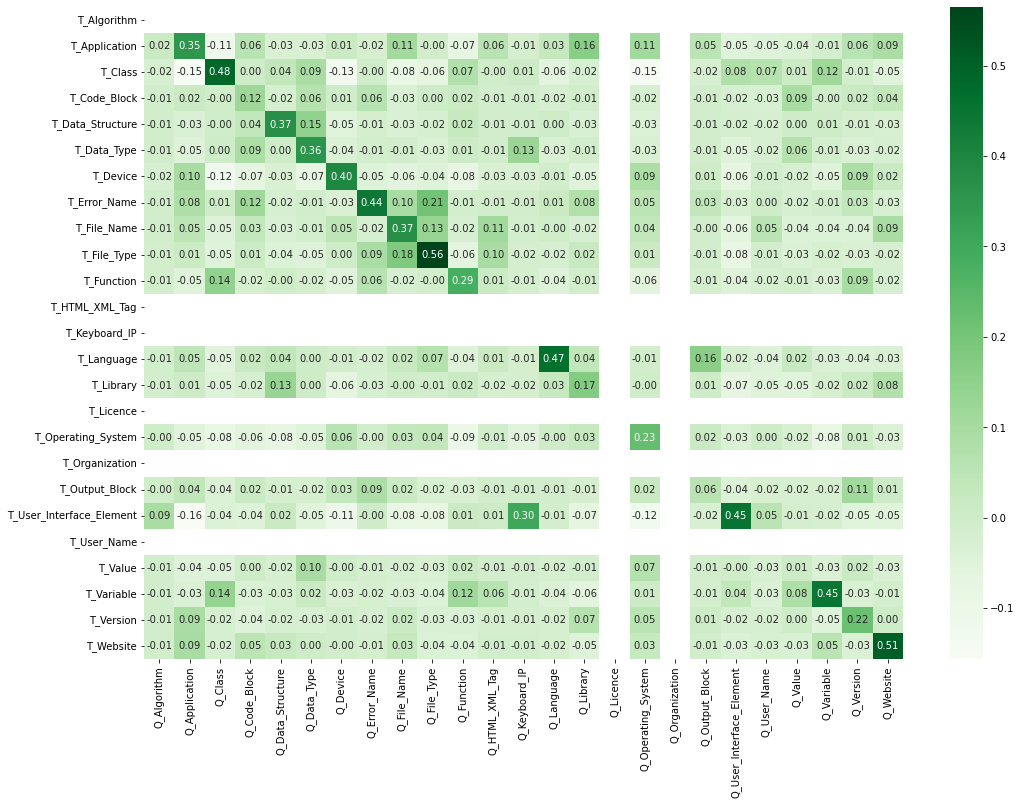

In [21]:
plt.figure(figsize=(17,12))
sns.heatmap(ent_corr, cmap="Greens",annot=True, fmt=".2f",)
plt.show()

# BBN


## Binary data

In [4]:
df = pd.read_pickle(r'D:\vkr\data\prepared\df_200_continuous_ner_cleared.pkl')

In [5]:
entities_df = df.iloc[:, -50:]
one_hot_df = entities_df.astype(bool).astype(int)

### Structure learning

#### Hill climbing BIC score 

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


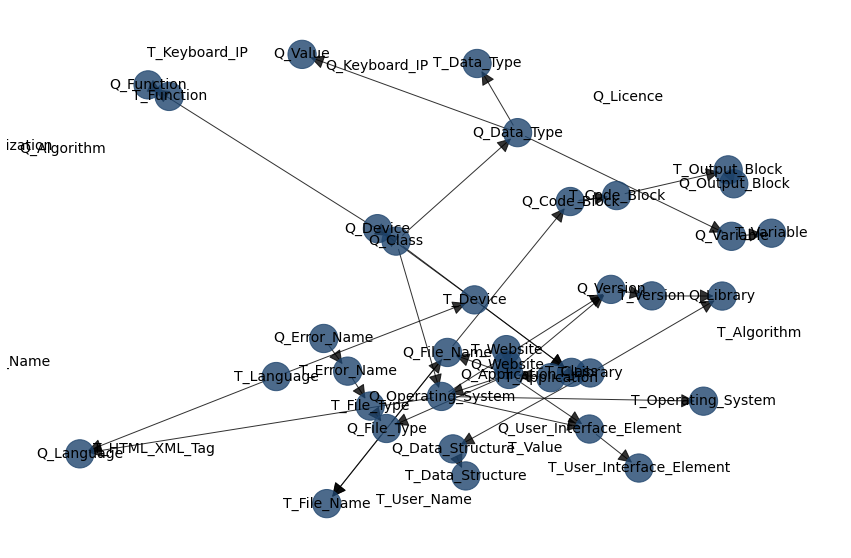

In [80]:
model_hc_bic  = bn.structure_learning.fit(one_hot_df, methodtype='hc', scoretype='bic')
G = bn.plot(model_hc_bic)

#### Hill climbing K2 score 

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


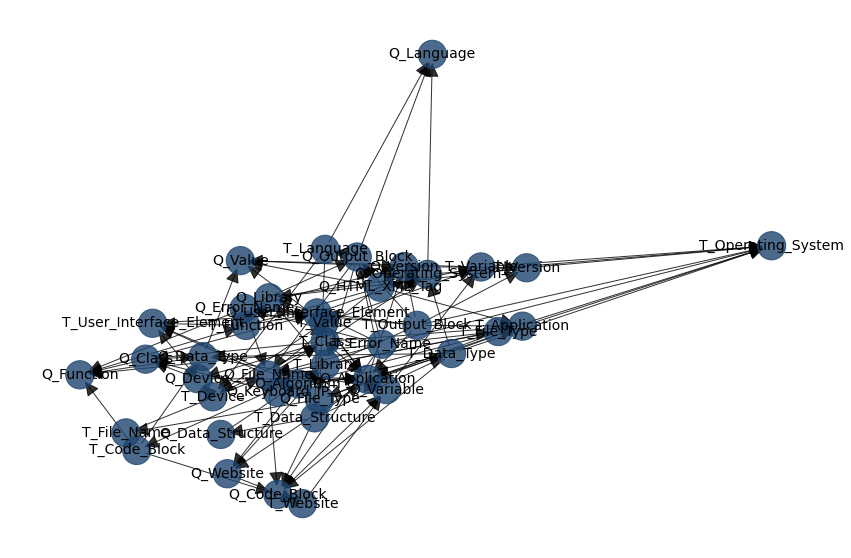

In [25]:
model_hc_k2  = bn.structure_learning.fit(one_hot_df, methodtype='hc', scoretype='k2')
G = bn.plot(model_hc_k2)

#### Hill climbing BDEU score 

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


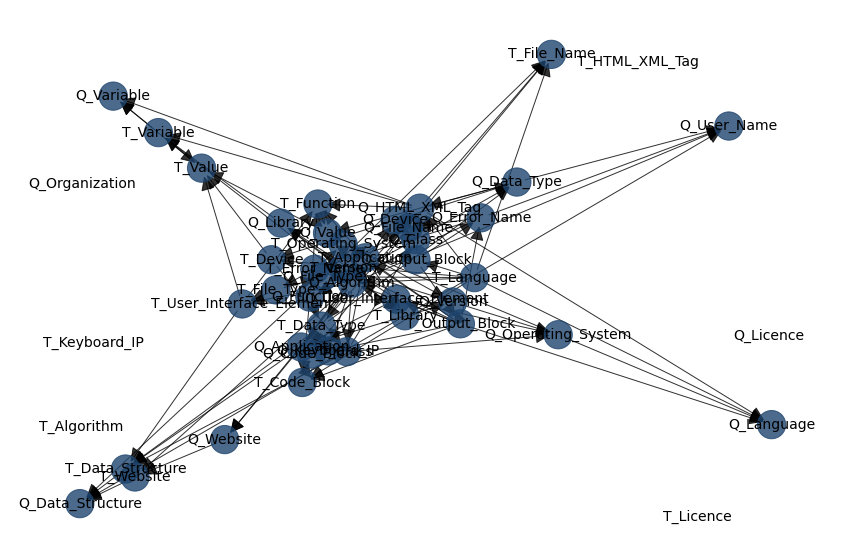

In [26]:
model_hc_bdeu = bn.structure_learning.fit(one_hot_df, methodtype='hc', scoretype='bdeu')
G = bn.plot(model_hc_bdeu)

#### Comparition

In [27]:
print('BDEU: '+ str(model_hc_bdeu['structure_scores']))
print('BIC: '+ str(model_hc_bic['structure_scores']))
print('K2: '+ str(model_hc_k2['structure_scores']))

BDEU: {'k2': -8050.693154659053, 'bds': -9206.097117124842, 'bic': -8572.237142397043, 'bdeu': -8004.256958286682}
BIC: {'k2': -8029.792403078038, 'bds': -9055.883671230373, 'bic': -8058.18819625652, 'bdeu': -8176.279899099803}
K2: {'k2': -7920.621132704982, 'bds': -10346.648326868552, 'bic': -11372.771617428147, 'bdeu': -8204.805289964504}


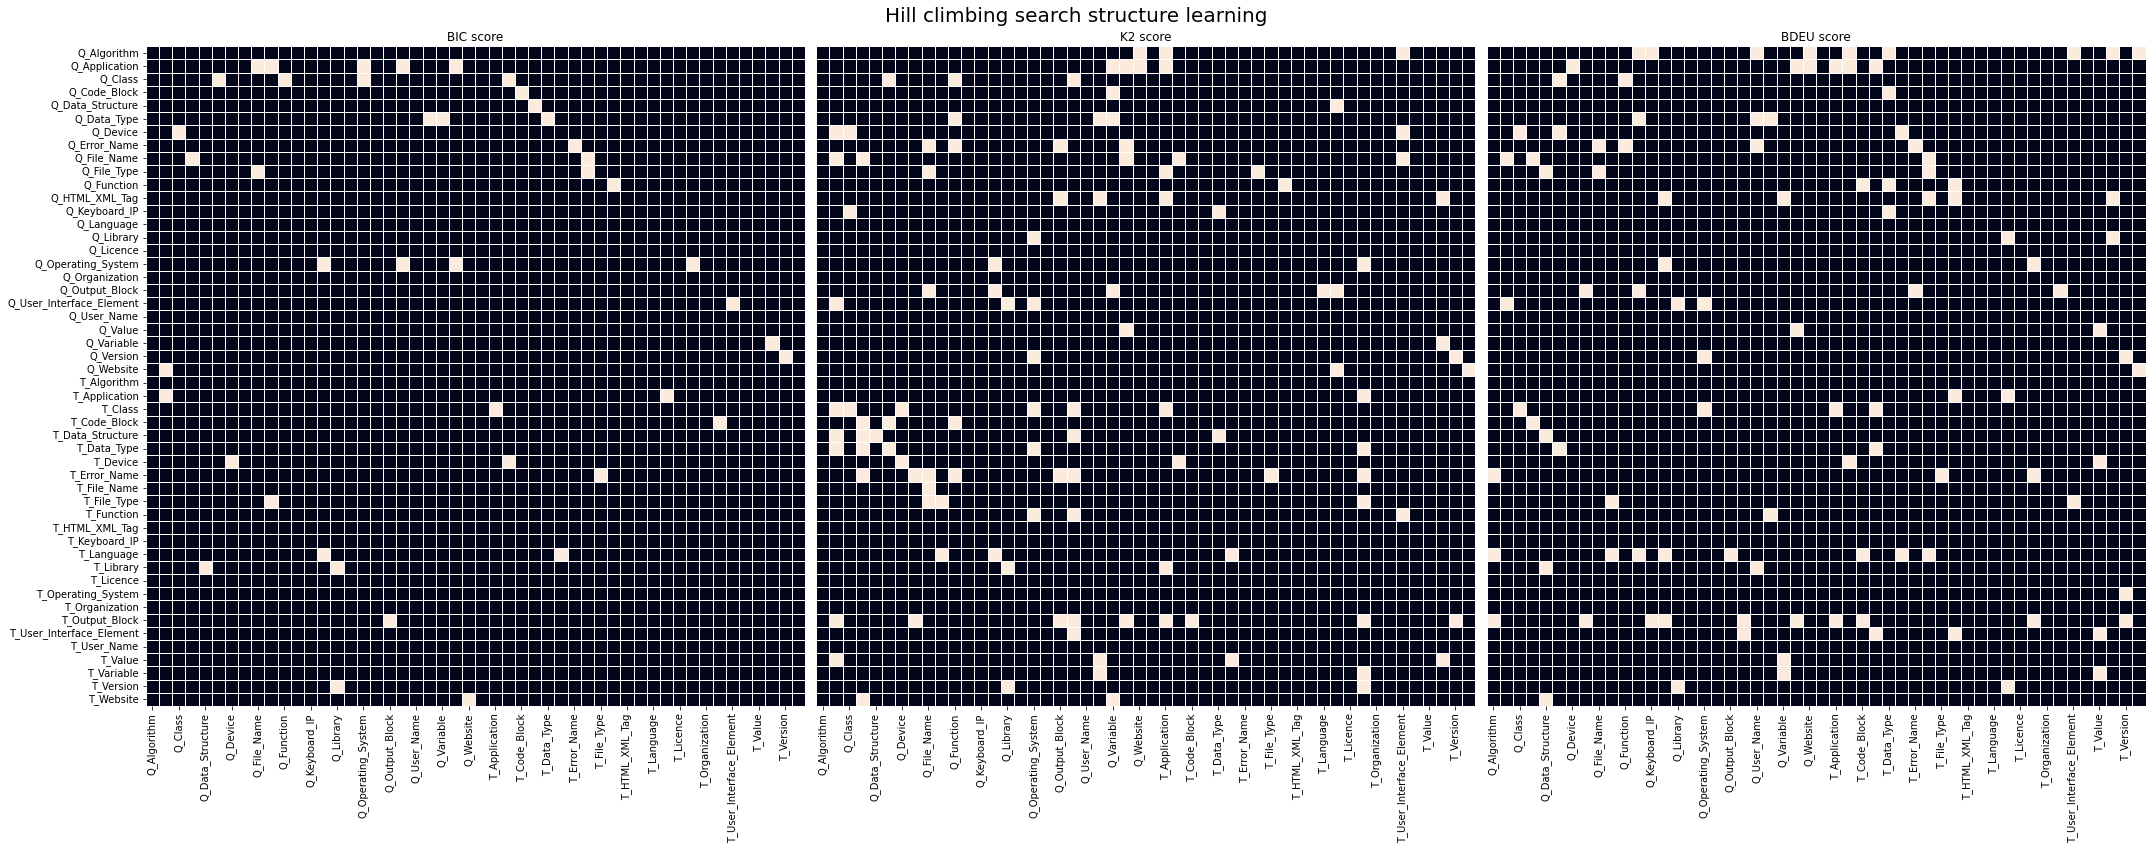

In [28]:
fig = plt.figure(figsize=(30,12))

ax_1 = plt.subplot(1,3,1) # first heatmap
sns.heatmap(model_hc_bic['adjmat'], cbar=False, linecolor="w", linewidths=1)

ax_2 = plt.subplot(1,3,2) # second heatmap
sns.heatmap(model_hc_k2['adjmat'], cbar=False, linecolor="w", linewidths=1, yticklabels = False)

ax_3 = plt.subplot(1,3,3) # third heatmap
sns.heatmap(model_hc_bdeu['adjmat'], cbar=False, linecolor="w", linewidths=1, yticklabels = False)

fig.suptitle('Hill climbing search structure learning', fontsize=20)

ax_1.title.set_text('BIC score')
ax_2.title.set_text('K2 score')
ax_3.title.set_text('BDEU score')

for ax in [ax_1, ax_2, ax_3]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

plt.show()

### Parameter learning

In [30]:
train_df, test_df = train_test_split(one_hot_df, test_size=0.3, shuffle=True, random_state=42)

#### Hill climbing

##### BIC

In [159]:
model_bic  = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='k2')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [160]:
model_bic = bn.independence_test(model_bic, train_df, prune=True)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Q_Algorithm <-> Q_Website] [P=0.357351] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Algorithm <-> T_User_Interface_Element] [P=0.651992] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Algorithm <-> Q_Application] [P=0.619584] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Application <-> T_Operating_System] [P=0.186915] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Class <-> T_Operating_System] [P=0.125044] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Code_Block <-> Q_Device] [P=1] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Data_Type <-> Q_Operating_System] [P=0.438357] is excluded because it was not significant (P<0.05) with [chi_square]
[bnlearn] >Edge [Q_Data

In [161]:
model_bic = bn.parameter_learning.fit(model_bic, train_df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Q_Application:
+--------------------------+-----+-----------------------------+
| Q_Website                | ... | Q_Website(1)                |
+--------------------------+-----+-----------------------------+
| T_Application            | ... | T_Application(1)            |
+--------------------------+-----+-----------------------------+
| T_User_Interface_Element | ... | T_User_Interface_Element(1) |
+--------------------------+-----+-----------------------------+
| Q_Application(0)         | ... | 0.5                         |
+--------------------------+-----+-----------------------------+
| Q_Application(1)         | ... | 0.5                         |
+--------------------------+-----+-----------------------------+
[bnlearn] >CPD of Q_Version:
+---------------+-----+------

### Evaluation

In [162]:
edges = {}
nodes = {}
for model, model_name in zip([model_bic], ['BIC']):

    edges[model_name] = dict()

    nodes[model_name] = []

    edges[model_name]['question'] = list(set([node for edge in model['model_edges'] for node in edge if node.startswith('Q')]))
    edges[model_name]['title'] = list(set([node for edge in model['model_edges'] for node in edge if node.startswith('T')]))

    nodes[model_name].extend(edges[model_name]['question'])
    nodes[model_name].extend(edges[model_name]['title'])

In [163]:
score_name = 'BIC'
bic_out = bn.predict(model_bic, test_df[nodes[f'{score_name}']], variables=edges[f'{score_name}']['title'])

[bnlearn]> Remaining columns for inference: 19


100%|██████████| 155/155 [03:03<00:00,  1.18s/it]


In [165]:
print(classification_report(bic_out.iloc[:, :-1],  test_df[edges['BIC']['title']]))

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.22      0.33      0.27         6
           2       0.00      0.00      0.00         0
           3       0.20      0.20      0.20         5
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.33      0.20      0.25        15
           7       0.08      0.25      0.12         8
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         0
          11       0.72      0.69      0.70       124
          12       0.36      0.24      0.29        17
          13       0.61      0.47      0.53        36
          14       0.00      0.00      0.00         6
          15       0.14      0.04      0.06        25
          16       0.59      0.52      0.55        73
          17       0.00    

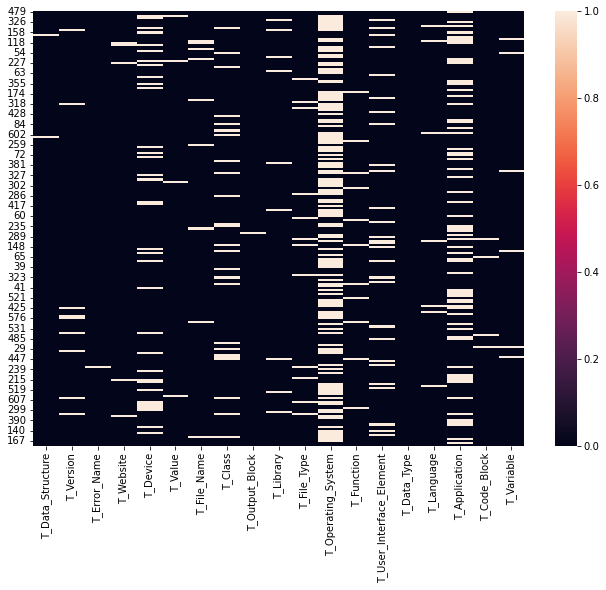

In [166]:
plt.figure(figsize=(11,8))
sns.heatmap(test_df[edges['BIC']['title']])
plt.show()

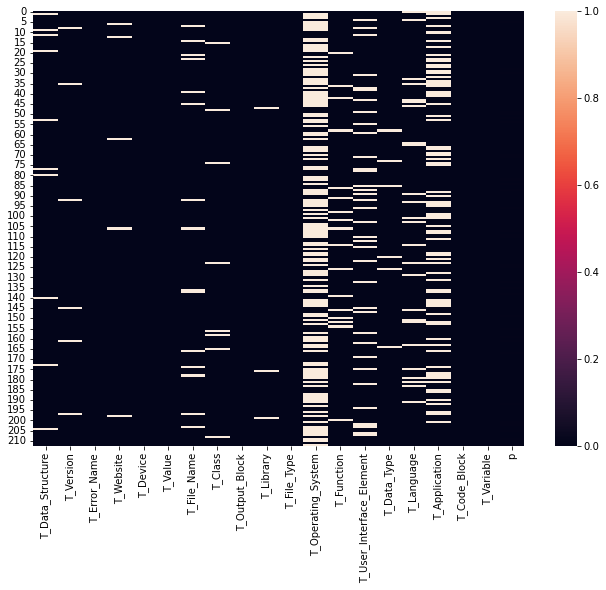

In [167]:
plt.figure(figsize=(11,8))
sns.heatmap(bic_out)
plt.show()

### Сохранение графа в csv

In [139]:
edges = pd.DataFrame(columns=['Source', 'Target', 'Source_type', 'Target_type', 'Soucre_cat', 'Target_cat', 'Weight'])

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


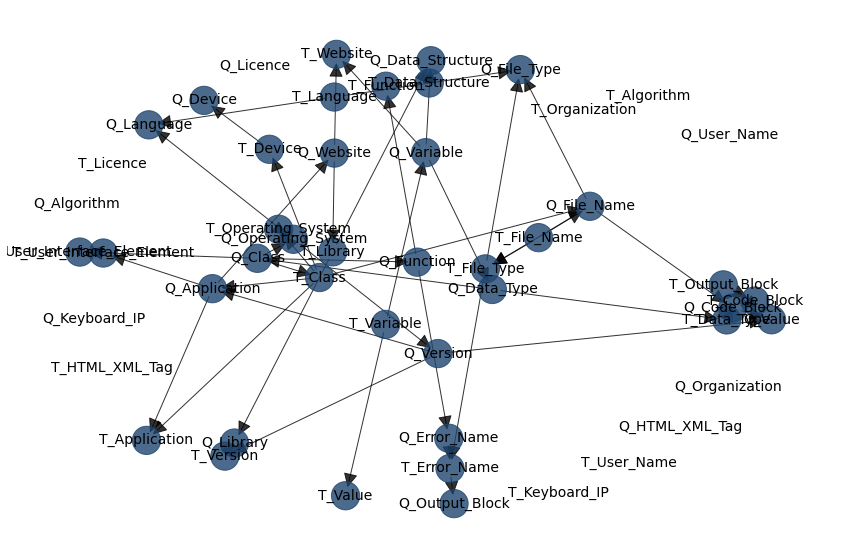

In [140]:
G = bn.plot(model_bic)

In [141]:
for idx, pair in enumerate(model_bic['model_edges']):
    if pair[0][0] == 'Q':
        source_type = 'Question'
    elif pair[0][0] == 'T':
        source_type = 'Title'

    if pair[1][0] == 'Q':
        target_type = 'Question'
    elif pair[1][0] == 'T':
        target_type = 'Title'

    source_cat = pair[0][2:]
    target_cat = pair[1][2:]

    weights = G['edge_properties'][pair]['weight']

    edges.loc[idx] = pair[0], pair[1], source_type, target_type, source_cat, target_cat, weights

In [142]:
edges.to_csv(r'D:\vkr\Notebooks\Analys\graphs\exp_1\hc_bdeu_pruned_mle.csv', index=False)

## Triple data

В каждом столбце отдельного класса NER для title и body (2N столбцов) должны быть числа

0 - сущности нет

1 - сущность в title и body совпадает

2 - сущность есть, но только одна в паре

In [6]:
df = pd.read_pickle(r"D:\vkr\data\prepared\df_200_continuous_ner_cleared.pkl")

entities_df = df.iloc[:, -50:]
triple_df = entities_df.astype(bool).astype(int)

for idx, row in triple_df.iterrows():
    for label in labels:
        try:
            if (
                triple_df.at[idx, f"T_{label}"] == 1
                and triple_df.at[idx, f"Q_{label}"] == 1
            ):
                #triple_df.at[idx, f"T_{label}"] = 2
                triple_df.at[idx, f"Q_{label}"] += 1
                pass
        except:
            continue

In [7]:
columns_to_use = triple_df.columns
empty_columns = []
for column in triple_df.columns:
    if (triple_df[column] == 0).all():
        empty_columns.append(column)

columns_to_use = list(set(columns_to_use)-set(empty_columns))

In [8]:
train_df, test_df = train_test_split(triple_df, test_size=0.3, shuffle=True, random_state=41)

In [9]:
train_columns_with_2 = []
train_columns_with_1 = []

test_columns_with_2 = []
test_columns_with_1 = []

for column in train_df.columns:
    if (train_df[column] == 1).any():
        train_columns_with_1.append(column)
    if (train_df[column] == 2).any():
        train_columns_with_2.append(column)

    if (test_df[column] == 1).any():
        test_columns_with_1.append(column)
    if (test_df[column] == 2).any():
        test_columns_with_2.append(column)

for col in test_columns_with_2:
    assert col in train_columns_with_2, 'Columns from test should be at train'

for col in test_columns_with_1:
    assert col in train_columns_with_1, 'Columns from test should be at train'

### Общий анализ кол-ва NER

In [492]:
ner_dict = {}
ner_dict['Not contains'] = {}
ner_dict['Only title'] = {}
ner_dict['Only question'] = {}
ner_dict['Both'] = {}

In [493]:
for idx, row in triple_df.iterrows():
    for label in labels:
        if triple_df.at[idx, f"Q_{label}"] == 2:
            if label not in ner_dict["Both"]:
                ner_dict["Both"][label] = 0
            ner_dict["Both"][label] += 1
        elif triple_df.at[idx, f"Q_{label}"] == 1:
            if label not in ner_dict["Only question"]:
                ner_dict["Only question"][label] = 0
            ner_dict["Only question"][label] += 1
        elif triple_df.at[idx, f"T_{label}"] == 1:
            if label not in ner_dict["Only title"]:
                ner_dict["Only title"][label] = 0
            ner_dict["Only title"][label] += 1
        else:
            if label not in ner_dict["Not contains"]:
                ner_dict["Not contains"][label] = 0
            ner_dict["Not contains"][label] += 1

In [494]:
ner_dict['Both']

{'Data_Type': 7,
 'Operating_System': 219,
 'Variable': 14,
 'Value': 3,
 'Application': 146,
 'Class': 78,
 'Version': 14,
 'File_Type': 24,
 'User_Interface_Element': 85,
 'Data_Structure': 7,
 'Device': 74,
 'Function': 17,
 'File_Name': 16,
 'Code_Block': 6,
 'Output_Block': 2,
 'Language': 22,
 'Website': 8,
 'Library': 18,
 'Error_Name': 5}

### Bnlearn

#### HC models

In [24]:
model_bic  = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='bic')
model_k2 = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='k2')
model_bdeu  = bn.structure_learning.fit(train_df, methodtype='hc', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [25]:
model_bic = bn.independence_test(model_bic, train_df, prune=True, verbose=False)
model_k2 = bn.independence_test(model_k2, train_df, prune=True, verbose=False)
model_bdeu = bn.independence_test(model_bdeu, train_df, prune=True, verbose=False)

In [26]:
model_bic = bn.parameter_learning.fit(model_bic, train_df, methodtype='maximumlikelihood', verbose=False)
model_k2 = bn.parameter_learning.fit(model_k2, train_df, methodtype='maximumlikelihood', verbose=False)
model_bdeu = bn.parameter_learning.fit(model_bdeu, train_df, methodtype='maximumlikelihood', verbose=False)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)


In [27]:
edges = {}
nodes = {}
for model, model_name in zip([model_bic, model_k2, model_bdeu], ['BIC', 'K2', 'BDEU']):

    edges[model_name] = dict()

    nodes[model_name] = []

    edges[model_name]['question'] = list(set([node for edge in model['model_edges'] for node in edge if node.startswith('Q')]))
    edges[model_name]['title'] = list(set([node for edge in model['model_edges'] for node in edge if node.startswith('T')]))

    nodes[model_name].extend(edges[model_name]['question'])
    nodes[model_name].extend(edges[model_name]['title'])

In [28]:
predictions = {}
for model, score_name in zip([model_bic, model_k2, model_bdeu], ['BIC', 'K2', 'BDEU']):
    predictions[score_name] = bn.predict(model, test_df[edges[f'{score_name}']['question']], variables=edges[f'{score_name}']['title'])

[bnlearn]> Remaining columns for inference: 18


100%|██████████| 189/189 [02:10<00:00,  1.44it/s]


[bnlearn]> Remaining columns for inference: 20


100%|██████████| 189/189 [03:55<00:00,  1.24s/it]


[bnlearn]> Remaining columns for inference: 20


100%|██████████| 189/189 [03:36<00:00,  1.14s/it]


In [38]:
structure_score = 'BDEU'

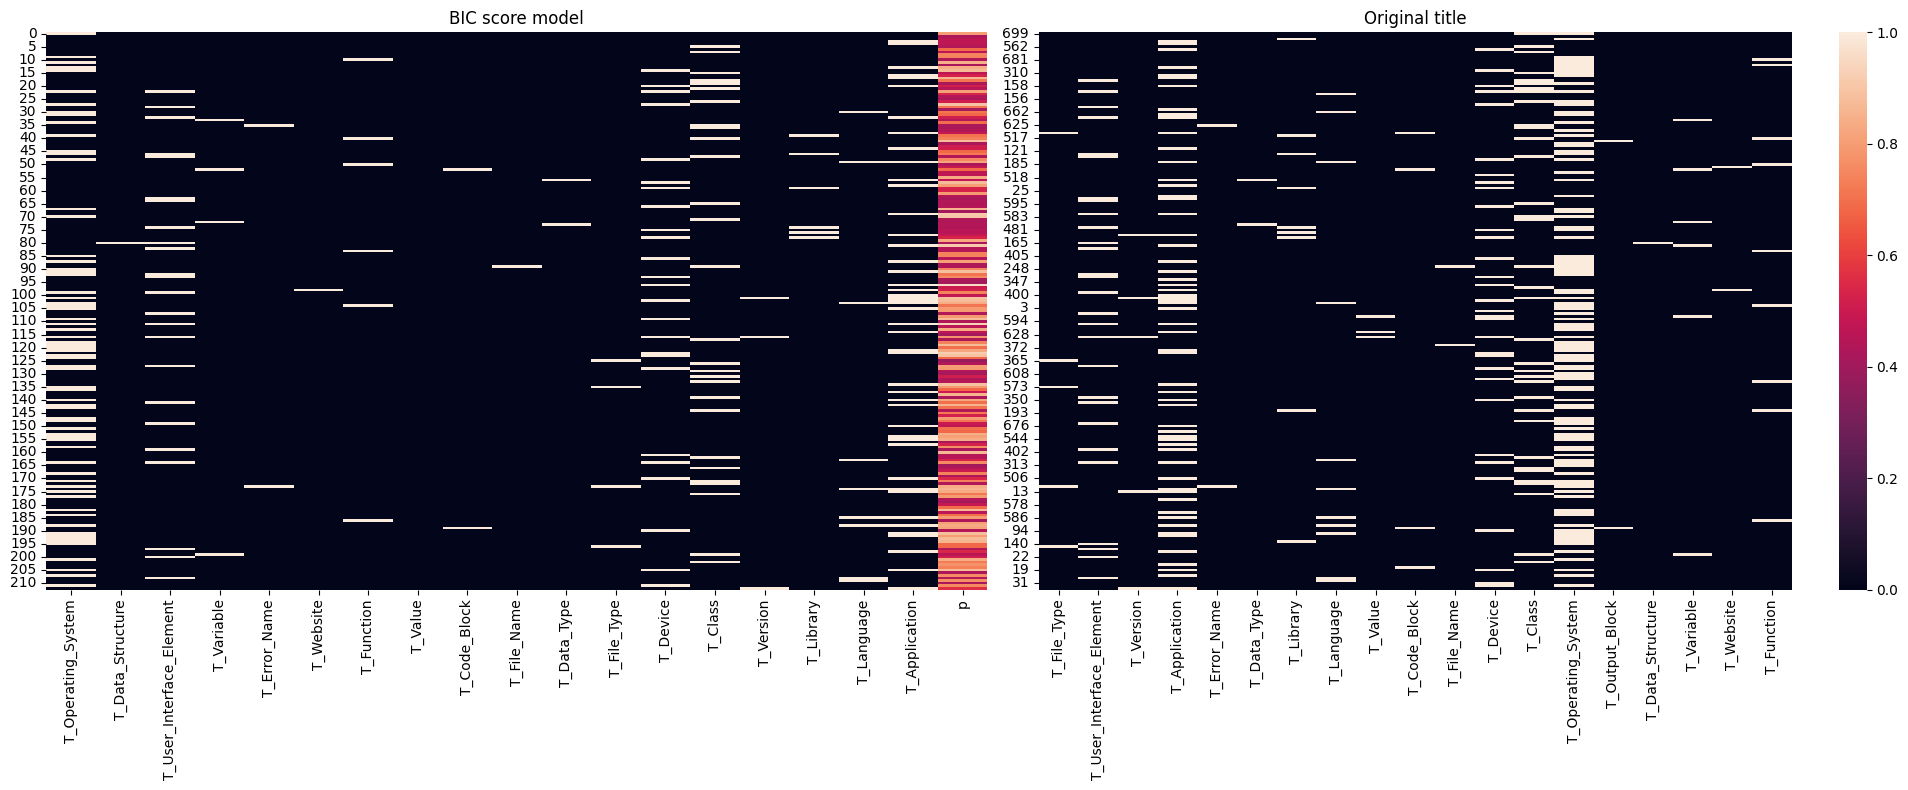

In [39]:
fig = plt.figure(figsize=(20,8))

ax_1 = plt.subplot(1,2,1) # first heatmap
sns.heatmap(predictions['BIC'], cbar=False)

ax_2 = plt.subplot(1,2,2) # second heatmap
sns.heatmap(test_df[edges[structure_score]['title']])

ax_1.title.set_text('BIC score model')
ax_2.title.set_text('Original title')


for ax in [ax_1, ax_2]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

plt.show()

In [40]:
print(classification_report(test_df[edges[structure_score]['title']], predictions[structure_score].iloc[:, :-1], target_names=predictions[structure_score].iloc[:, :-1].columns))

                          precision    recall  f1-score   support

             T_File_Type       1.00      0.60      0.75         5
T_User_Interface_Element       1.00      0.82      0.90        28
               T_Version       1.00      0.60      0.75         5
           T_Application       1.00      0.76      0.87        59
            T_Error_Name       1.00      0.50      0.67         2
             T_Data_Type       1.00      1.00      1.00         2
               T_Library       1.00      0.67      0.80         9
              T_Language       1.00      0.82      0.90        11
                 T_Value       0.00      0.00      0.00         3
            T_Code_Block       1.00      0.50      0.67         4
             T_File_Name       1.00      0.50      0.67         2
                T_Device       1.00      0.78      0.88        32
                 T_Class       1.00      0.80      0.89        35
      T_Operating_System       1.00      0.63      0.78       104
         

#### Сохранение графа

In [533]:
edges = pd.DataFrame(columns=['Source', 'Target', 'Source_type', 'Target_type', 'Soucre_cat', 'Target_cat'])

In [534]:
for idx, pair in enumerate(model_bdeu['model_edges']):
    if pair[0][0] == 'Q':
        source_type = 'Question'
    elif pair[0][0] == 'T':
        source_type = 'Title'

    if pair[1][0] == 'Q':
        target_type = 'Question'
    elif pair[1][0] == 'T':
        target_type = 'Title'

    source_cat = pair[0][2:]
    target_cat = pair[1][2:]

    #weights = G['edge_properties'][pair]['weight']

    edges.loc[idx] = pair[0], pair[1], source_type, target_type, source_cat, target_cat

In [535]:
edges.to_csv(r'D:\vkr\Notebooks\Analys\graphs\exp_3\hc_bdeu_mle_triple.csv', index=False)

### BAMT

In [61]:
import bamt.Networks as Nets
import bamt.Preprocessors as pp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from bamt.Builders import StructureBuilder

from pgmpy.estimators import BDeuScore, K2Score, BicScore
from gmr import GMM
import seaborn as sns

In [80]:
df = pd.read_pickle(r"D:\vkr\data\prepared\df_200_continuous_ner_cleared.pkl")

entities_df = df.iloc[:, -50:]
triple_df = entities_df.astype(bool).astype(int)

for idx, row in triple_df.iterrows():
    for label in labels:
        if (
            triple_df.at[idx, f"T_{label}"] == 1
            and triple_df.at[idx, f"Q_{label}"] == 1
        ):
            #triple_df.at[idx, f"T_{label}"] = 2
            triple_df.at[idx, f"Q_{label}"] = 2

In [81]:
encoder = preprocessing.LabelEncoder()

In [82]:
train_df, test_df = train_test_split(triple_df, test_size=0.3, shuffle=True, random_state=42)

In [413]:
columns_to_use = train_df.columns
empty_columns = []
for column in train_df.columns:
    if (train_df[column] == 0).all():
        empty_columns.append(column)

In [414]:
columns_to_use = list(set(columns_to_use)-set(empty_columns))

In [83]:
p = pp.Preprocessor([('encoder', encoder)])
discretized_data, est = p.apply(train_df)

2022-12-19 14:18:44,197 | INFO     | Preprocessors.py-scan-0087 | No one column is continuous


In [84]:
bbn = Nets.DiscreteBN()

In [85]:
bbn.add_nodes(p.info)

#### Stucture learning

In [86]:
bbn.add_edges(train_df,  scoring_function=('K2', K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

#### Parameter learning

In [87]:
bbn.fit_parameters(train_df)

#### Inference

In [88]:
X_columns = ['Q_'+label for label in labels]
Y_columns = ['T_'+label for label in labels]

# X_columns = [col for col in nodes['BIC'] if col.startswith('Q_')]
# Y_columns = [col for col in nodes['BIC'] if col.startswith('T_')]

In [89]:
validY = test_df[Y_columns]
validX = test_df[X_columns]

In [148]:
predictions_bic = bbn.predict(test=validX, parall_count=6)

100%|██████████| 213/213 [00:13<00:00, 16.29it/s]


#### Evaluation

In [149]:
predicts = pd.DataFrame(predictions_bic).astype(int)

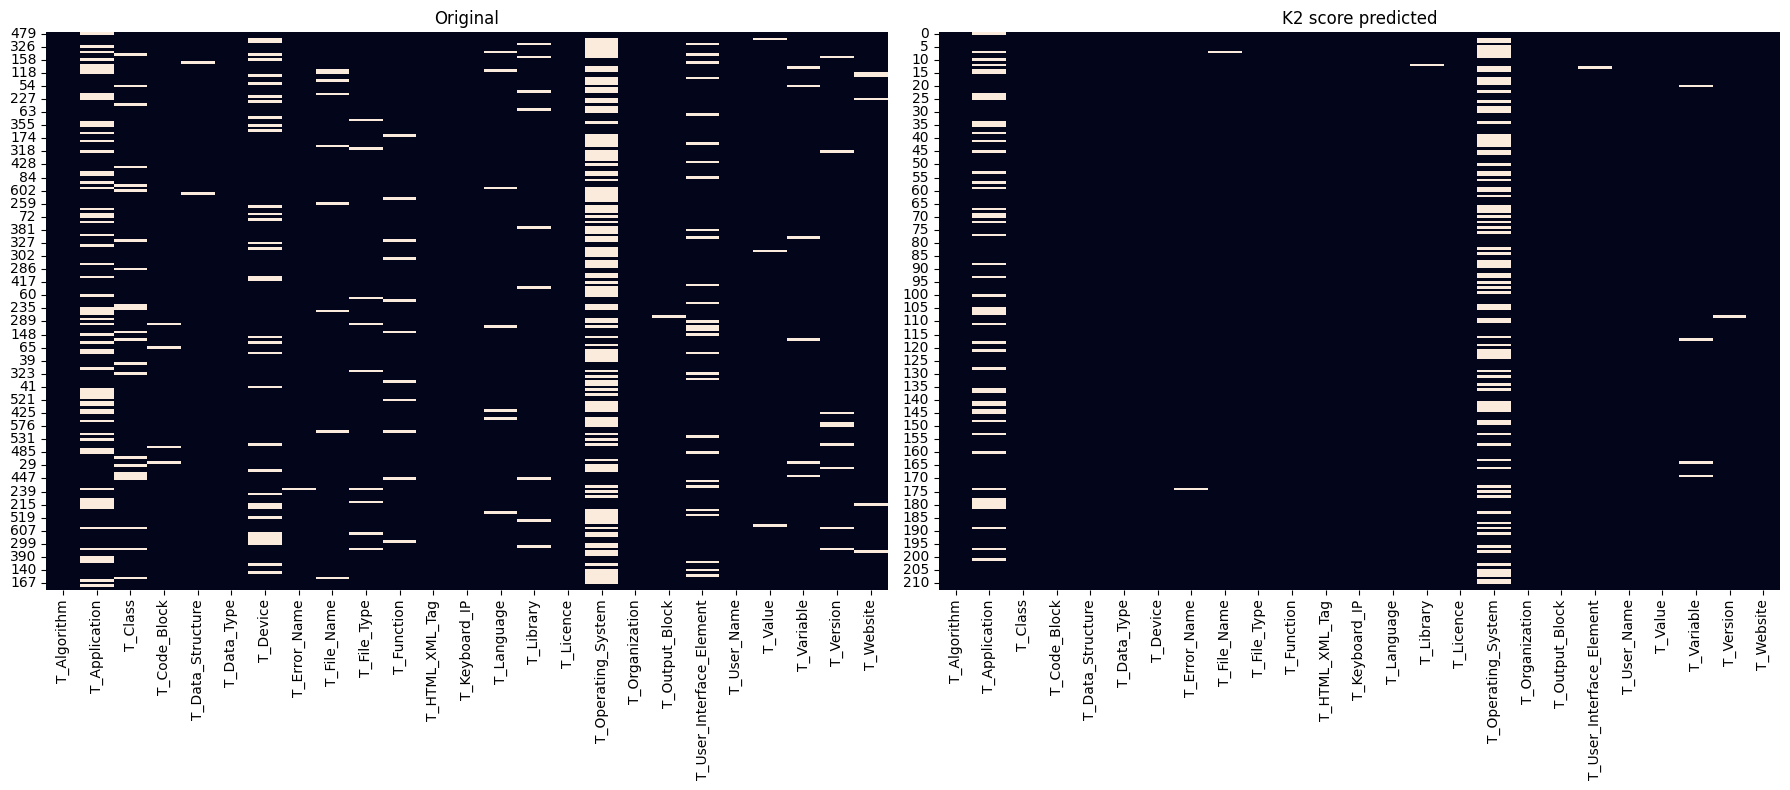

In [150]:
fig = plt.figure(figsize=(18,8))

ax_1 = plt.subplot(1,2,1) # first heatmap
sns.heatmap(validY[Y_columns], cbar=False)

ax_2 = plt.subplot(1,2,2) # second heatmap
sns.heatmap(predicts[Y_columns], cbar=False)

ax_1.title.set_text('Original')
ax_2.title.set_text('K2 score predicted')

for ax in [ax_1, ax_2]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

plt.show()

In [151]:
X_columns_to_use = [col for col in columns_to_use if col.startswith('Q_')]
Y_columns_to_use = [col for col in columns_to_use if col.startswith('T_')]

In [152]:
print(classification_report(validY[Y_columns], predicts[Y_columns], target_names=Y_columns))

                          precision    recall  f1-score   support

             T_Algorithm       0.00      0.00      0.00         0
           T_Application       1.00      0.77      0.87        64
                 T_Class       0.00      0.00      0.00        22
            T_Code_Block       0.00      0.00      0.00         4
        T_Data_Structure       0.00      0.00      0.00         2
             T_Data_Type       0.00      0.00      0.00         0
                T_Device       0.00      0.00      0.00        35
            T_Error_Name       1.00      1.00      1.00         1
             T_File_Name       0.00      0.00      0.00         9
             T_File_Type       0.00      0.00      0.00         9
              T_Function       0.00      0.00      0.00        11
          T_HTML_XML_Tag       0.00      0.00      0.00         0
           T_Keyboard_IP       0.00      0.00      0.00         0
              T_Language       0.00      0.00      0.00         7
         

In [144]:
bbn.calculate_weights(train_df)

In [145]:
ids_to_del = []
for idx, edge in enumerate(bbn.edges):
    if bbn.weights[tuple(edge)] < 0.1:
        ids_to_del.append(idx)      

In [146]:
new_list_edges = [val for n, val in enumerate(bbn.edges) if n not in ids_to_del]

In [147]:
bbn.edges = new_list_edges

#### Graph saving

In [95]:
edges = pd.DataFrame(columns=['Source', 'Target', 'Weight'])

In [96]:
for idx, item in enumerate(bbn.weights.items()):
    
    source = item[0][0]
    target = item[0][1]

    weight = item[1]

    edges.loc[idx] = source, target, weight

In [77]:
edges

,Source,Target,Weight
0,Q_Licence,Q_Algorithm,0.000000
1,Q_Algorithm,Q_Output_Block,0.000745
2,Q_Algorithm,Q_Application,0.002279
3,Q_Output_Block,Q_Application,0.003763
4,Q_Algorithm,Q_Device,0.001499
...,...,...,...
137,Q_Class,T_Data_Type,0.118391
138,Q_Operating_System,T_Data_Type,0.102903
139,Q_Application,T_Error_Name,0.025629
140,Q_Class,T_Error_Name,0.040018


In [97]:
edges.to_csv(r'D:\vkr\Notebooks\Analys\graphs\exp_3\hc_k2_bamt.csv', index=False)

### Sorobn

In [5]:
import sorobn as hh

In [208]:
df = pd.read_pickle(r"D:\vkr\data\prepared\df_200_continuous_ner_cleared.pkl")

entities_df = df.iloc[:, -50:]
triple_df = entities_df.astype(bool).astype(int)

for idx, row in triple_df.iterrows():
    for label in labels:
        if (
            triple_df.at[idx, f"T_{label}"] == 1
            and triple_df.at[idx, f"Q_{label}"] == 1
        ):
            #triple_df.at[idx, f"T_{label}"] = 2
            triple_df.at[idx, f"Q_{label}"] = 2

In [209]:
train_df, test_df = train_test_split(triple_df, test_size=0.3, shuffle=True, random_state=41)

#### Learn structure

In [210]:
structure = hh.structure.chow_liu(train_df)

In [211]:
bbn = hh.BayesNet(*structure)

In [212]:
bbn = bbn.fit(train_df)

#### Get predictions

In [213]:
X_columns = ['Q_'+label for label in labels]
Y_columns = ['T_'+label for label in labels]

In [214]:
validY = test_df[Y_columns]

validX = test_df[X_columns]

In [215]:
predict_dict = {}

In [217]:
for t_col in tqdm(Y_columns):
    predict_dict[t_col] = []
    for i in range(len(validX)):
        true_proba = bbn.query(t_col, event=dict(validX.iloc[i]), algorithm='rejection')
        try:
            predict_dict[t_col].append(true_proba[1])
        except:
            predict_dict[t_col].append(0)

  0%|          | 0/25 [00:00<?, ?it/s]

In [218]:
predicted_df = pd.DataFrame(predict_dict)

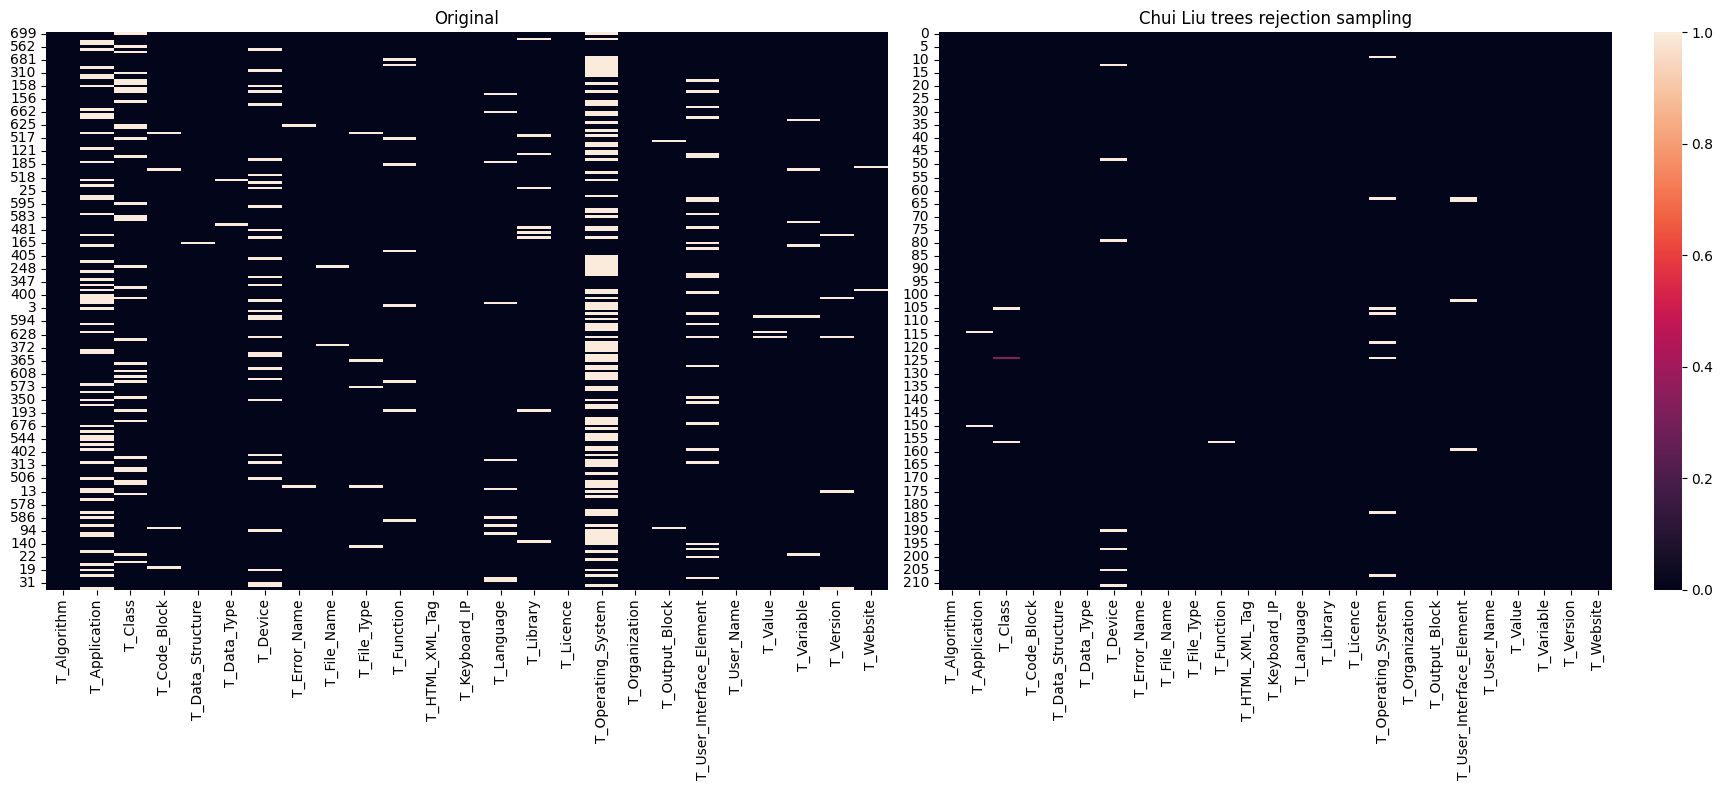

In [219]:
fig = plt.figure(figsize=(18,8))

ax_1 = plt.subplot(1,2,1) # first heatmap
sns.heatmap(validY[Y_columns], cbar=False)

ax_2 = plt.subplot(1,2,2) # second heatmap
sns.heatmap(predicted_df)

ax_1.title.set_text('Original')
ax_2.title.set_text('Chui Liu trees rejection sampling')

for ax in [ax_1, ax_2]:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

plt.show()

#### Evaluation

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import f1_score

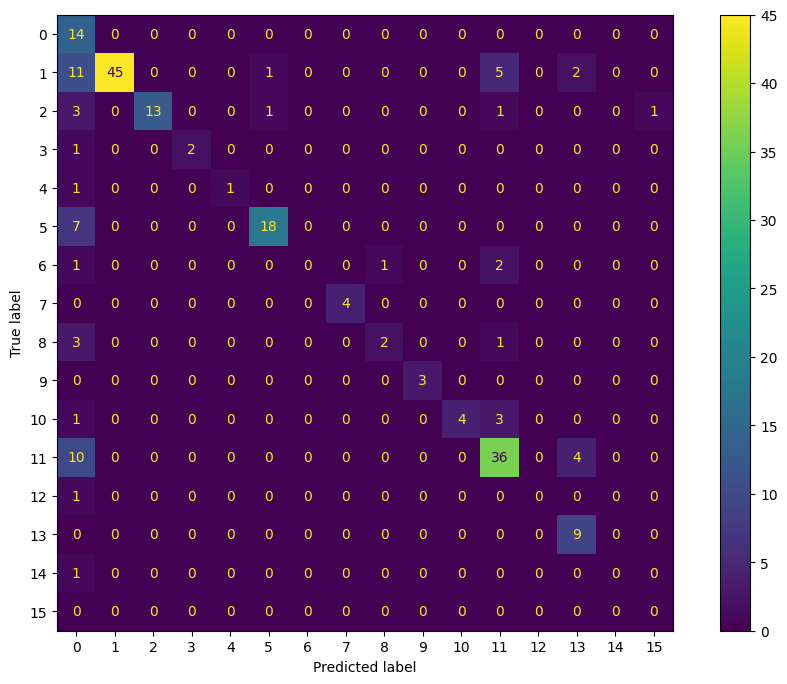

In [100]:
fig, ax = plt.subplots(figsize=(12, 8))
# Create the matrix
cmp = confusion_matrix(np.asarray(validY[Y_columns]).argmax(axis=1), np.asarray(predicted_df >= 0.5).argmax(axis=1))
cmp = ConfusionMatrixDisplay(cmp)
cmp.plot(ax=ax)

plt.show()

In [226]:
import scipy

def thr_to_f1(thr, Y_test, predicted_df):
   return -f1_score(Y_test, np.array(predicted_df>thr, dtype=np.int), average='macro')

best_thr = scipy.optimize.fmin(thr_to_f1, args=(np.asarray(validY[Y_columns]), np.asarray(predicted_df)), x0=0.8, maxiter=100)

Optimization terminated successfully.
         Current function value: -0.023328
         Iterations: 10
         Function evaluations: 29


In [227]:
best_thr

array([0.8])

In [225]:
print(classification_report(validY[Y_columns], predicted_df > 0.5, target_names=Y_columns))

                          precision    recall  f1-score   support

             T_Algorithm       0.00      0.00      0.00         0
           T_Application       1.00      0.03      0.07        59
                 T_Class       0.00      0.00      0.00        35
            T_Code_Block       0.00      0.00      0.00         4
        T_Data_Structure       0.00      0.00      0.00         1
             T_Data_Type       0.00      0.00      0.00         2
                T_Device       0.57      0.12      0.21        32
            T_Error_Name       0.00      0.00      0.00         2
             T_File_Name       0.00      0.00      0.00         2
             T_File_Type       0.00      0.00      0.00         5
              T_Function       0.00      0.00      0.00         9
          T_HTML_XML_Tag       0.00      0.00      0.00         0
           T_Keyboard_IP       0.00      0.00      0.00         0
              T_Language       0.00      0.00      0.00        11
         

#### Graph saving

In [238]:
graph = pd.DataFrame(columns=['Source', 'Target'])

In [245]:
for idx, parent in enumerate(bbn.children.keys()):
    for child in bbn.children[parent]:
        
        source = parent
        target = child

        graph.loc[idx] = source, target

In [247]:
graph.to_csv(r'D:\vkr\Notebooks\Analys\graphs\exp_3\tree_sorobn.csv', index=False)